In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from pyspark.sql.types import FloatType



In [56]:
data_path = 'C:/HOMEWARE/Project/ML/linear-regression/data/'
input_dataset_path = data_path + '01_raw/'
model_dataset_path = data_path + '06_models/'
output_dataset_path = data_path + '07_model_output/'
train_x_path = input_dataset_path + 'x.csv'
train_y_path = input_dataset_path + 'y.csv'
predicted_z_path = output_dataset_path + 'z.csv'



In [57]:
import pandas as pd

df_x = pd.read_csv(train_x_path)
df_y = pd.read_csv(train_y_path)


In [58]:
df_x

,ft_1,ft_2
0,1,0
1,1,1
2,1,2
3,2,3
4,2,4
5,2,5
6,3,5
7,3,6
8,4,6
9,4,7


In [59]:
df_y

,t_1
0,4
1,6
2,8
3,11
4,13
5,15
6,16
7,18
8,19
9,21


In [60]:
df_x.rename(columns = {'ft_1':'X_0', 'ft_2':'X_1'}, inplace = True)
df_x

,X_0,X_1
0,1,0
1,1,1
2,1,2
3,2,3
4,2,4
5,2,5
6,3,5
7,3,6
8,4,6
9,4,7


In [61]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X_0     17 non-null     int64
 1   X_1     17 non-null     int64
dtypes: int64(2)
memory usage: 400.0 bytes


In [62]:
df_y.rename(columns = {'t_1':'Y_0'}, inplace = True)
df_y

,Y_0
0,4
1,6
2,8
3,11
4,13
5,15
6,16
7,18
8,19
9,21


In [63]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y_0     17 non-null     int64
dtypes: int64(1)
memory usage: 264.0 bytes


# Prepare Data

In [64]:
x = df_x.to_numpy(int)

In [65]:
y = df_y.to_numpy(int)

In [66]:
y[:,0]

array([ 4,  6,  8, 11, 13, 15, 16, 18, 19, 21, 22, 23, 25, 26, 28, 29, 30])

In [67]:
y[np.mod(np.arange(y.size),2)==0]

array([[ 4],
       [ 8],
       [13],
       [16],
       [19],
       [22],
       [25],
       [28],
       [30]])

In [68]:
y[np.mod(np.arange(y.size),2)!=0]

array([[ 6],
       [11],
       [15],
       [18],
       [21],
       [23],
       [26],
       [29]])

# Target
y = 1 x X_0 + 2 x X_1 + 3

# Add Some Noise

In [69]:
lamda_func = lambda x: np.dot(x, np.array([1, 2]) + np.random.rand()) + 3

In [70]:
y_with_noise = lamda_func(x)
df_y_with_noise = pd.DataFrame(y_with_noise, columns = ['t_0'])

In [71]:
df_y_with_noise

,t_0
0,4.455703
1,6.911406
2,9.367109
3,13.278515
4,15.734218
5,18.189921
6,19.645624
7,22.101327
8,23.557030
9,26.012733


In [72]:
headers = ['t_0', 't_0_with_noise']
data = [df_y, df_y_with_noise['t_0']]
df_check = pd.concat(data, axis=1, keys=headers)

In [73]:
df_check

,t_0,t_0_with_noise
,Y_0,t_0
0,4,4.455703
1,6,6.911406
2,8,9.367109
3,11,13.278515
4,13,15.734218
5,15,18.189921
6,16,19.645624
7,18,22.101327
8,19,23.557030


# Plot the Data

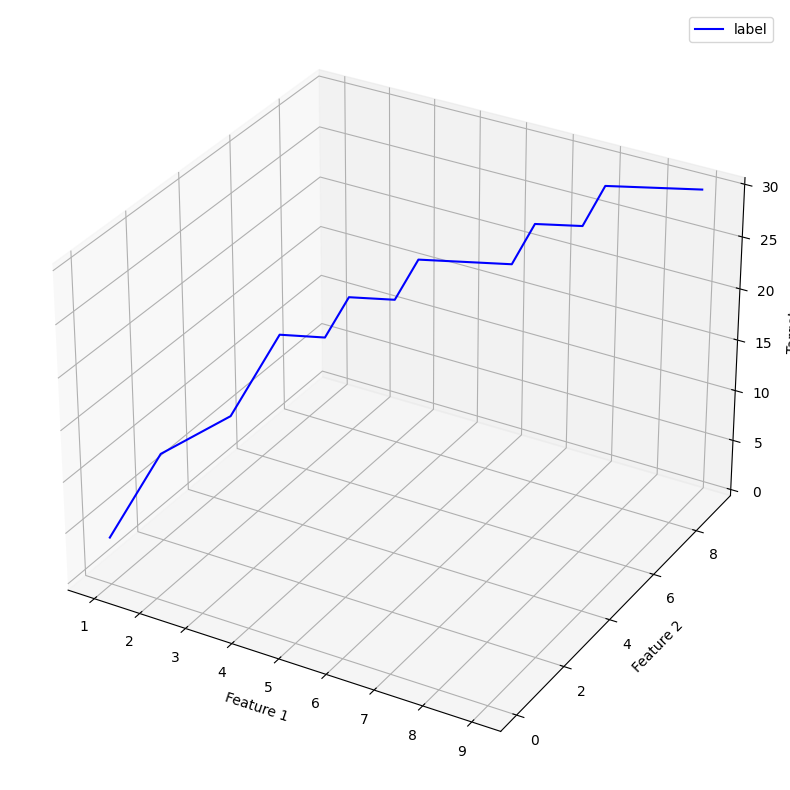

In [74]:
plt.figure(figsize=(20,10))

ax = plt.axes(projection='3d')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')

ft_1 = x[:,0]
ft_2 = x[:,1]
t_1 = y[:,0]

ax.plot3D(ft_1, ft_2, t_1, label='label', color='blue')
ax.set_zlim(zmin=0)
ax.legend()

plt.show()

# Fit the model

In [75]:
reg = LinearRegression().fit(x, y_with_noise)

In [76]:
data_predicted = reg.predict(x)

In [77]:
data_predicted

array([ 4.455703,  6.911406,  9.367109, 13.278515, 15.734218, 18.189921,
       19.645624, 22.101327, 23.55703 , 26.012733, 27.468436, 28.924139,
       31.379842, 32.835545, 35.291248, 36.746951, 38.202654])

In [78]:
t_1

array([ 4,  6,  8, 11, 13, 15, 16, 18, 19, 21, 22, 23, 25, 26, 28, 29, 30])

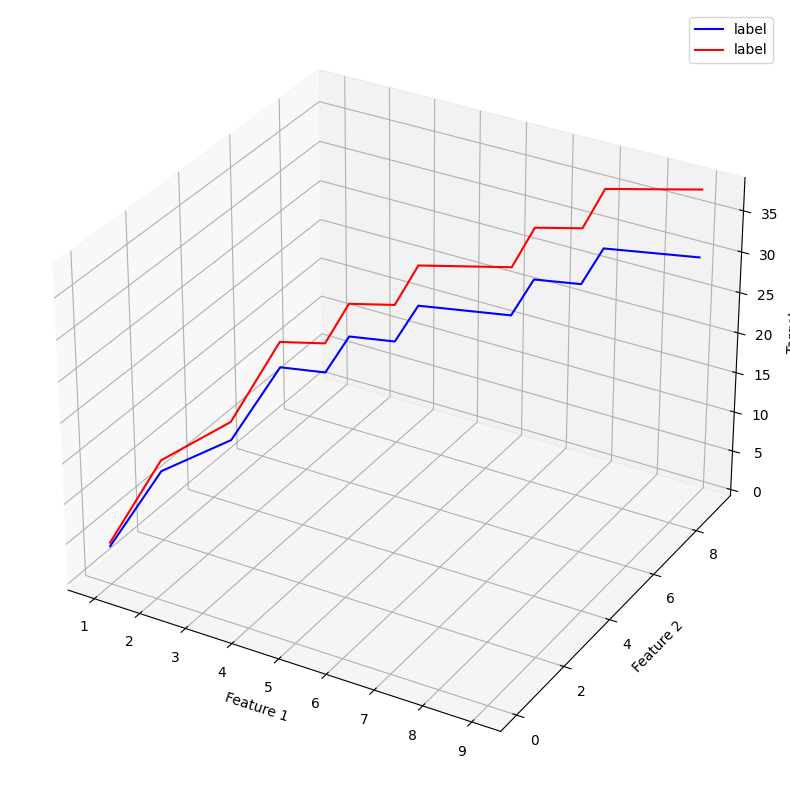

In [79]:
plt.figure(figsize=(20,10))

ax = plt.axes(projection='3d')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')

ft_1 = x[:,0]
ft_2 = x[:,1]
t_1 = y[:,0]

ax.plot3D(ft_1, ft_2, t_1, label='label', color='blue')
ax.plot3D(ft_1, ft_2, data_predicted, label='label', color='red')

ax.set_zlim(zmin=0)
ax.legend()

plt.show()

# Score the model

In [80]:
score = reg.score(x, y)
score

0.5869333440282285

# COEF/WEIGHT OF THE MODEL

In [81]:
coef = reg.coef_
coef

array([1.455703, 2.455703])

# INTERCEPT OF THE MODEL

In [82]:
intercept = reg.intercept_
intercept

3.0000000000000107

# Save Model To Disk

In [83]:
import pickle
filename = model_dataset_path + 'reg.bin'
pickle.dump(reg, open(filename, 'wb'))



# Load Model From Disk

In [84]:
reg_loaded = pickle.load(open(filename, 'rb'))

# Predict

In [104]:
single_entry_to_predict = np.array([[3, 5]])
print(single_entry_to_predict)
print("data expected:", 16.0)

[[3 5]]
data expected: 16.0


In [105]:
reg_loaded.predict(single_entry_to_predict)

array([19.645624])

# re-run the prediction on the train dataset

In [106]:
data_predicted = reg_loaded.predict(df_x)
data_predicted

c:\HOMEWARE\miniconda3\envs\default-ml\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([ 4.455703,  6.911406,  9.367109, 13.278515, 15.734218, 18.189921,
       19.645624, 22.101327, 23.55703 , 26.012733, 27.468436, 28.924139,
       31.379842, 32.835545, 35.291248, 36.746951, 38.202654])

# Write Outputs To Disk

In [114]:
column = ['t_1']
df_data_predicted = pd.DataFrame(data_predicted, columns=column)
df_data_predicted

df_data_predicted.to_csv(output_dataset_path + 'y.csv', index=False)